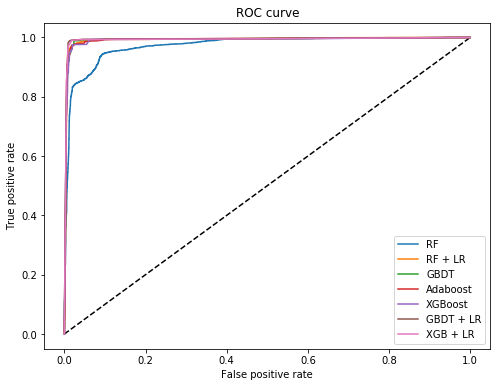

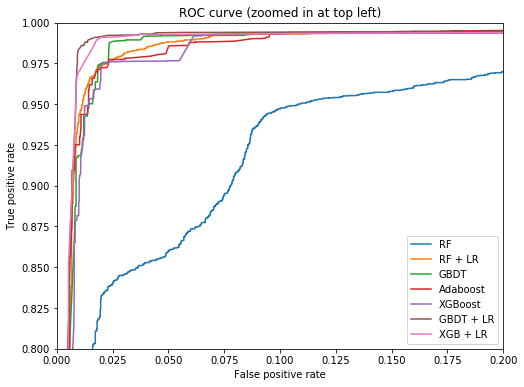

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

n_estimator = 20
X, y = make_classification(n_samples=20000)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_train_lr, y_train, y_train_lr = train_test_split(X_train,y_train,test_size=0.5)

# RF + LR
rf = RandomForestClassifier(max_depth=3, n_estimators=n_estimator)
rf_enc = OneHotEncoder()
rf_lm = LogisticRegression()
rf.fit(X_train, y_train)
rf_enc.fit(rf.apply(X_train))
rf_lm.fit(rf_enc.transform(rf.apply(X_train_lr)), y_train_lr)

y_pred_rf_lm = rf_lm.predict_proba(rf_enc.transform(rf.apply(X_test)))[:, 1]
fpr_rf_lm, tpr_rf_lm, _ = roc_curve(y_test, y_pred_rf_lm)

# GBDT + LR
grd = GradientBoostingClassifier(n_estimators=n_estimator)
grd_enc = OneHotEncoder()
grd_lm = LogisticRegression()
grd.fit(X_train, y_train)
grd_enc.fit(grd.apply(X_train)[:, :, 0])
grd_lm.fit(grd_enc.transform(grd.apply(X_train_lr)[:, :, 0]), y_train_lr)
y_pred_grd_lm = grd_lm.predict_proba(grd_enc.transform(grd.apply(X_test)[:, :, 0]))[:, 1]
fpr_grd_lm, tpr_grd_lm, _ = roc_curve(y_test, y_pred_grd_lm)


# xgboost + LR
xgb = XGBClassifier(n_estimators=n_estimator)
xgb_enc = OneHotEncoder()
xgb_lm = LogisticRegression()
xgb.fit(X_train, y_train)
xgb_enc.fit(xgb.apply(X_train)[:, :])
xgb_lm.fit(xgb_enc.transform(xgb.apply(X_train_lr)[:, :]), y_train_lr)
y_pred_xgb_lm = xgb_lm.predict_proba(
    xgb_enc.transform(xgb.apply(X_test)[:, :]))[:, 1]
fpr_xgb_lm, tpr_xgb_lm, _ = roc_curve(y_test, y_pred_xgb_lm)

# The gradient boosted model by itself
y_pred_grd = grd.predict_proba(X_test)[:, 1]
fpr_grd, tpr_grd, _ = roc_curve(y_test, y_pred_grd)


# The random forest model by itself
y_pred_rf = rf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

# The AdaBoost model by itself
ada = AdaBoostClassifier(n_estimators=n_estimator)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict_proba(X_test)[:, 1]
fpr_ada, tpr_ada, _ = roc_curve(y_test, y_pred_ada)


# The xgboost model by itself
y_pred_xgb = xgb.predict_proba(X_test)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_xgb)

plt.figure(1,figsize=(8,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_ada, tpr_ada, label='Adaboost')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')

plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.plot(fpr_xgb_lm, tpr_xgb_lm, label='XGB + LR')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

plt.figure(2,figsize=(8,6))
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF')
plt.plot(fpr_rf_lm, tpr_rf_lm, label='RF + LR')
plt.plot(fpr_grd, tpr_grd, label='GBDT')
plt.plot(fpr_ada, tpr_ada, label='Adaboost')
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost')

plt.plot(fpr_grd_lm, tpr_grd_lm, label='GBDT + LR')
plt.plot(fpr_xgb_lm, tpr_xgb_lm, label='XGB + LR')

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()